<a href="https://colab.research.google.com/github/eggtgg/bt_minhtriho_all/blob/main/k2_n3/thuat_toan/4_3_23/bt_pca_4_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 0.92, 'Original Dataset')

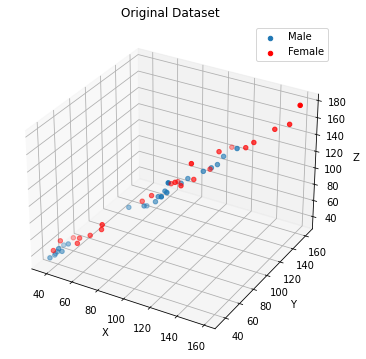

In [34]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example 3D dataset
np.random.seed(0)
M = np.array([[93, 94, 96, 101, 102, 103, 104, 106, 107, 112, 113, 114, 116, 117, 117, 119, 120, 120, 121, 125, 127, 128, 131, 135],
[74, 78, 80, 84, 85, 81, 83, 83, 82, 89, 88, 86, 90, 90, 91, 93, 89, 93, 95, 93, 96, 95, 95, 106],
[37, 35, 35, 39, 38, 37, 39, 39, 38, 40, 40, 40, 43, 41, 41, 41, 40, 44, 42, 45, 45, 45, 46, 47]])
M = np.reshape(M, (24,-1))
F = np.array([[98, 103, 103, 105, 109, 123, 123, 133, 133, 133, 134, 136, 137, 138, 141, 147, 149, 153, 155, 155, 158, 159, 162, 177],
[81, 84, 86, 86, 88, 92, 95, 99, 102, 102, 100, 102, 98, 99, 105, 108, 107, 107, 115, 117, 115, 118, 124, 132],
[38, 38, 42, 40, 44, 50, 46, 51, 51, 51, 48, 49, 51, 51, 53, 57, 55, 56, 63, 60, 62, 63, 61, 67]])
F = np.reshape(F, (24,-1))
# Standardize the data

# Perform PCA on the dataset M
pca = PCA(n_components=3)
pca.fit(M)
M_pca = pca.transform(M)

# Perform PCA on the dataset F
pca_f = PCA(n_components=3)
pca_f.fit(F)
F_pca_f = pca.transform(F)

# Plot the original dataset in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M[:, 0], M[:, 1], M[:, 2])


ax.scatter(F[:, 0], F[:, 1], F[:, 2], c='red')
plt.legend(['Male','Female'])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original Dataset')

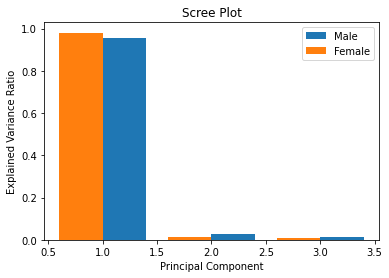

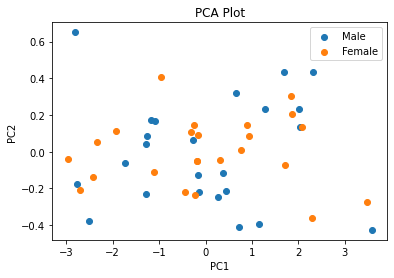

In [55]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df_M = pd.DataFrame({
    'length': [93, 94, 96, 101, 102, 103, 104, 106, 107, 112, 113, 114, 116, 117, 117, 119, 120, 120, 121, 125, 127, 128, 131, 135],
    'width': [74, 78, 80, 84, 85, 81, 83, 83, 82, 89, 88, 86, 90, 90, 91, 93, 89, 93, 95, 93, 96, 95, 95, 106],
    'height': [37, 35, 35, 39, 38, 37, 39, 39, 38, 40, 40, 40, 43, 41, 41, 41, 40, 44, 42, 45, 45, 45, 46, 47]
})

df_F = pd.DataFrame({
    'length': [98, 103, 103, 105, 109, 123, 123, 133, 133, 133, 134, 136, 137, 138, 141, 147, 149, 153, 155, 155, 158, 159, 162, 177],
    'width': [81, 84, 86, 86, 88, 92, 95, 99, 102, 102, 100, 102, 98, 99, 105, 108, 107, 107, 115, 117, 115, 118, 124, 132],
    'height': [38, 38, 42, 40, 44, 50, 46, 51, 51, 51, 48, 49, 51, 51, 53, 57, 55, 56, 63, 60, 62, 63, 61, 67]
})

# Standardize the data
df_standardized_M = (df_M - df_M.mean()) / df_M.std()
df_standardized_F = (df_F - df_F.mean()) / df_F.std()

# Perform PCA on the standardized data
pca_M = PCA()
pca_M.fit(df_standardized_M)

pca_F = PCA()
pca_F.fit(df_standardized_F)

# Get the explained variance ratio for each principal component
explained_var_M = pca_M.explained_variance_ratio_
explained_var_F = pca_F.explained_variance_ratio_


# Plot the scree plot
plt.bar(np.array([1,2,3])+.2, explained_var_M, width=0.4)
plt.bar(np.array([1,2,3])-.2, explained_var_F, width=0.4)
plt.legend(['Male','Female'])

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Get the scores for each observation on each principal component
scores_M = pca_M.transform(df_standardized_M)
scores_F = pca_F.transform(df_standardized_F)

# Plot the scores for the first two principal components
plt.scatter(scores_M[:, 0], scores_M[:, 1])
plt.scatter(scores_F[:, 0], scores_F[:, 1])
plt.legend(['Male','Female'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()